# Um a Zero:

"Uma das obras primas de Pixinguinha, foi gravado pela primeira vez pelo próprio autor ao saxofone em duo com Benedito Lacerda em disco Victor 80-0442-A, lançado em 1946. Editado pela Irmãos Vitale com coautoria de Benedito Lacerda por razões extra-musicais. Segundo Sérgio Cabral, em sua biografia Pixinguinha, vida e obra (Lumiar Editora, 1997), este choro teria sido composto em homenagem à vitória do Brasil sobre a seleção uruguaia no campeonato sul-americano de 1919, com gol do craque Friedenreich." [1]
<br><br>78 RPM, 1946. Victor Catálogo: 80-0442-a [2]
<br>Faixas: 
<br>1 - Um A Zero (Pixinguinha / Benedito Lacerda)
<br>2 - Sofres Porque Queres (Pixinguinha / Benedito Lacerda)
<br><br>



Referências:

[1] Página biográfica de Pixinguinha: https://pixinguinha.com.br/discografia/1-x-0-um-a-zero/

[2] Instituto Memória Musical Brasileira: https://immub.org/artista/pixinguinha
        
  


In [339]:
import os
from ipywidgets import Dropdown, HBox, VBox, Button
import ipywidgets as widgets
import IPython.display as ipd
from IPython.display import Markdown, clear_output
import librosa
from midi2audio import FluidSynth

#song name, index, song path, offset, duration
array_data=[ (0, 'Pixinguinha e Benedito Lacerda (1946)','data/03 Um a Zero.m4a', 0, 17),
             (1, 'Pixinguinha (1966)', 'data/01 Um a Zero.m4a', 23, 14), 
             (2, 'Trio Madeira Brasil (1998)', 'data/14 Um a Zero.m4a', 18 , 14.6),
             (3, 'Yo-Yo Ma (2003)', 'data/08 1 X 0 (Um a Zero).m4a', 4.2, 18.4),
             (4, 'Izabel Padovani(?)', 'data/1x0.wav',0,15.3),
             (5, 'NUMUT - Universidade Federal de Uberlândia (2007)', 'data/Um_a_zero.wav', 4.2, 19.2)
            ]

song_name_list = [row[1] for row in array_data]
index_list = [row[0] for row in array_data]
d_name = dict(zip(song_name_list, index_list)) 

wid1 = Dropdown(options=song_name_list, value = 'Pixinguinha e Benedito Lacerda (1946)')
wid2 = Dropdown(options=song_name_list, value = 'Yo-Yo Ma (2003)')

print("Escolha duas interpretações e compile as células abaixo:")
HBox([wid1, wid2])

Escolha duas interpretações e compile as células abaixo:


HBox(children=(Dropdown(options=('Pixinguinha e Benedito Lacerda (1946)', 'Pixinguinha (1966)', 'Trio Madeira Brasil (1998)', 'Yo-Yo Ma (2003)', 'Izabel Padovani(?)', 'NUMUT - Universidade Federal de Uberlândia (2007)'), value='Pixinguinha e Benedito Lacerda (1946)'), Dropdown(index=3, options=('Pixinguinha e Benedito Lacerda (1946)', 'Pixinguinha (1966)', 'Trio Madeira Brasil (1998)', 'Yo-Yo Ma (2003)', 'Izabel Padovani(?)', 'NUMUT - Universidade Federal de Uberlândia (2007)'), value='Yo-Yo Ma (2003)')))

In [345]:
   def audio_info(value, signal_name = "", offset = 0, duration = ""):
    cut_audio = True
    if (cut_audio):
        x, Fs = librosa.load(value, sr = 44100, offset = offset, duration = duration)
    else:
        x, Fs = librosa.load(value, sr = 44100)

    print('The signal %s has %d samples, Fs = %d and a duration of %.2f seconds.' % (signal_name, len(x), Fs, len(x) / Fs))
    ipd.display(ipd.Audio(x, rate=Fs))
    return(x, Fs);

line1 = d_name[wid1.value]
line2 = d_name[wid2.value]
x1, Fs1 = audio_info(array_data[line1][2],
                     signal_name = array_data[line1][1],
                     offset = array_data[line1][3],
                     duration = array_data[line1][4])

x2, Fs2 = audio_info(array_data[line2][2],
                     signal_name = array_data[line2][1],
                     offset = array_data[line2][3],
                     duration = array_data[line2][4])




The signal NUMUT - Universidade Federal de Uberlândia (2007) has 882000 samples, Fs = 44100 and a duration of 20.00 seconds.


The signal Yo-Yo Ma (2003) has 811440 samples, Fs = 44100 and a duration of 18.40 seconds.


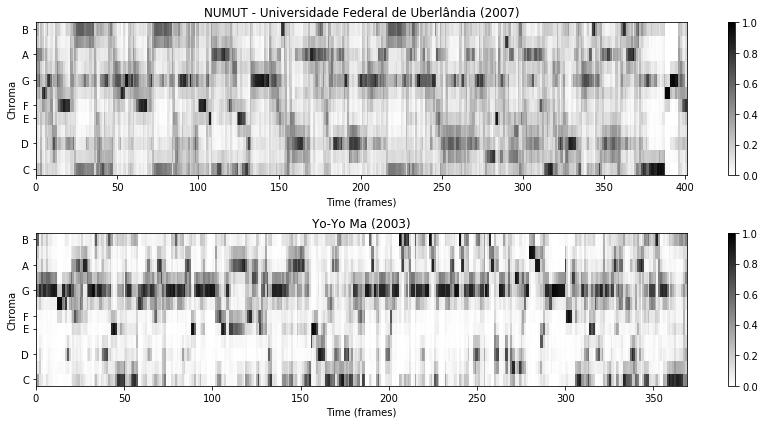

In [346]:
import matplotlib.pyplot as plt
import matplotlib
import librosa, librosa.display
import numpy as np
%matplotlib inline

N = 4410
H = hop_size = 2205
X = librosa.feature.chroma_stft(y=x1, sr=Fs1, tuning=0, norm=2, hop_length=H, n_fft=N)
Y = librosa.feature.chroma_stft(y=x2, sr=Fs2, tuning=0, norm=2, hop_length=H, n_fft=N)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title( array_data[line1][1])
librosa.display.specshow(X, x_axis='frames', y_axis='chroma', cmap='gray_r', hop_length=H)
plt.xlabel('Time (frames)')
plt.ylabel('Chroma')
plt.colorbar()
plt.clim([0, 1])

plt.subplot(2, 1, 2)
plt.title( array_data[line2][1])
librosa.display.specshow(Y, x_axis='frames', y_axis='chroma', cmap='gray_r', hop_length=H)
plt.colorbar()
plt.clim([0, 1])
plt.xlabel('Time (frames)')
plt.ylabel('Chroma')
plt.tight_layout()


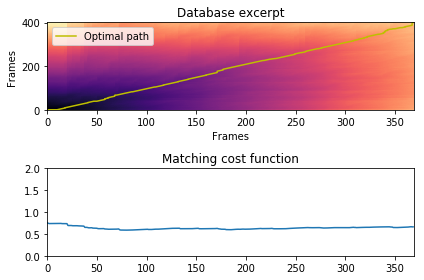

In [347]:
D, wp = librosa.sequence.dtw(X, Y)
plt.subplot(2, 1, 1)
librosa.display.specshow(D, x_axis='frames', y_axis='frames')
plt.title('Database excerpt')
plt.plot(wp[:, 1], wp[:, 0], label='Optimal path', color='y')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(D[-1, :] / wp.shape[0])
plt.xlim([0, Y.shape[1]])
plt.ylim([0, 2])
plt.title('Matching cost function')
plt.tight_layout()
plt.show()

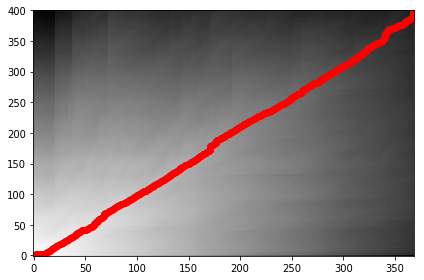

In [348]:
#D, wp = librosa.sequence.dtw(X, Y)
plt.imshow(D, aspect='auto', cmap='gray_r', origin='lower')
plt.plot(wp[:, 1], wp[:, 0], 'ro-')
plt.tight_layout()

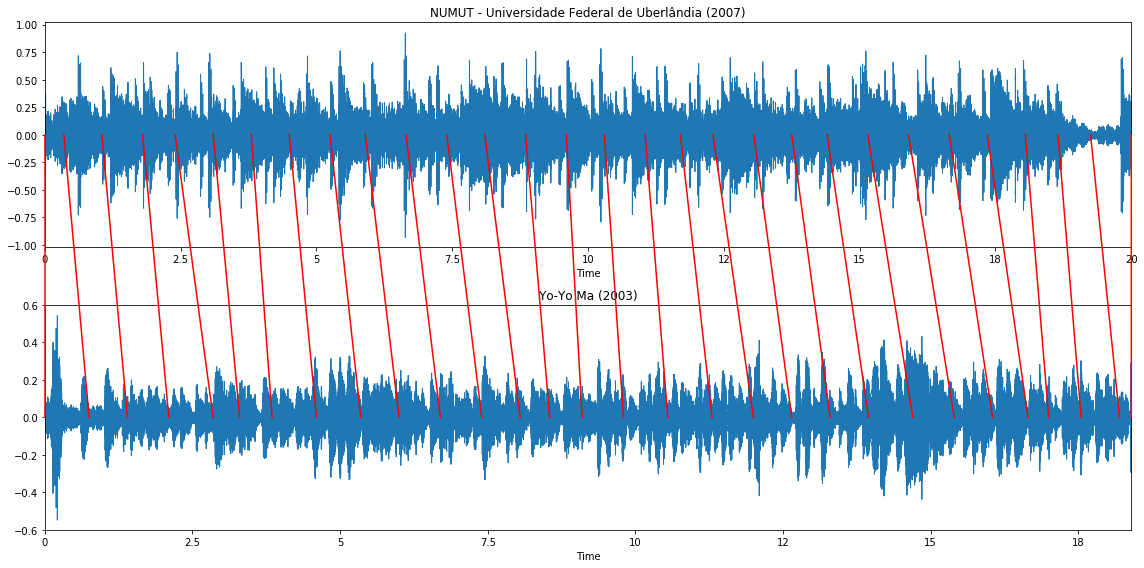

In [349]:
fig = plt.figure(figsize=(16, 8))

# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(x1, sr=fs)
plt.title(array_data[line1][1])
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(x2, sr=fs)
plt.title(array_data[line2][1])
ax2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
points_idx = np.int16(np.round(np.linspace(0, wp.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tp1, tp2 in wp[points_idx] * hop_size / fs:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tp1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tp2, 0]))

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)

fig.lines = lines
plt.tight_layout()